In [136]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import calendar
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

In [139]:
loc_titanic = os.path.join('..', 'data', 'titanic.xlsx')
loc_forecasts = os.path.join('..', 'data', 'generated_forecasts.xlsx')
loc_7_dwarfs = os.path.join('..', 'data', '7_dwarfs_train.csv')
loc_sp500 = os.path.join('..', 'data', 'sp500_data.csv')
loc_sp500_sectors = os.path.join('..', 'data', 'sp500_sectors.csv')

## Oefening 1

In [6]:
df_titanic = pd.read_excel(loc_titanic)

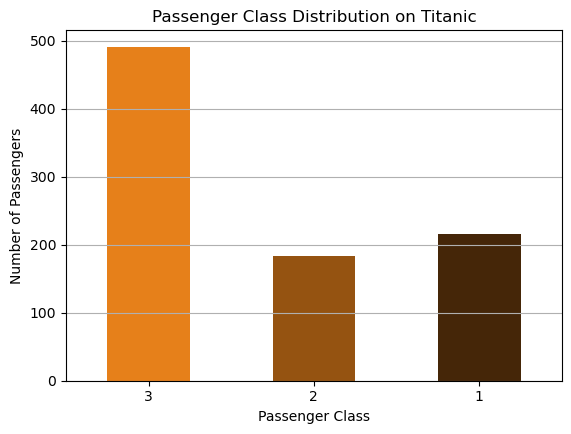

In [32]:
gen_color = np.array([0.9, 0.5, 0.1])

df_titanic['Pclass'] = pd.Categorical(df_titanic['Pclass'], categories = [3, 2, 1], ordered = True)
ax = df_titanic['Pclass'].value_counts()\
                            .sort_index(ascending = True)\
                            .plot.bar(color=[gen_color * a for a in np.linspace(1, 0.3, num = 3)])

# Set the title and labels
ax.set_title('Passenger Class Distribution on Titanic')
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Number of Passengers')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


# Adjust the spacing between the bars
plt.subplots_adjust(bottom=0.15)

# Add grid lines
ax.yaxis.grid(True)

# Show the plot
plt.show()

## Oefening 2

In [56]:
df_forecasts = pd.read_excel(loc_forecasts)

# Part 1: computing the actuals
df_actuals = df_forecasts.groupby(['quarter_forecasted'])\
                            .last()\
                            .set_index('quarter')\
                            .rename({'forecast' : 'Actual'}, axis = 1)

# Part 2: forecasts for each quarter
quarters = sorted(list(set(df_forecasts.quarter)))
dict_forecasts = dict()

for quarter, group in df_forecasts.groupby('quarter_forecasted'):
    dict_forecasts[quarter] = group['forecast'].values

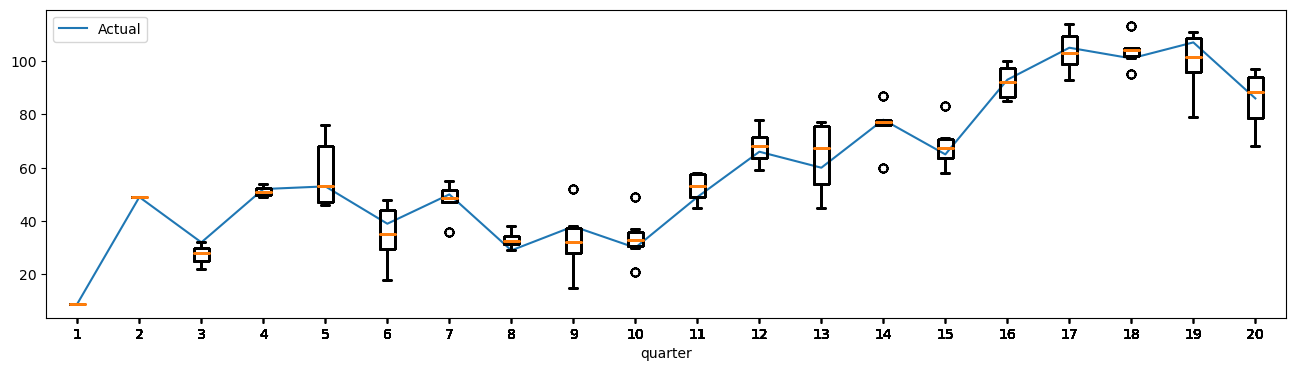

In [62]:
fig, ax = plt.subplots(figsize = (16, 4))

df_actuals.plot(y = 'Actual', ax = ax)

for quarter, group in df_forecasts.groupby('quarter_forecasted'):
    ax.boxplot(list(dict_forecasts.values()),
                    positions = list(dict_forecasts.keys()),
                    widths = [0.25 for i in dict_forecasts])

## Oefening 3

**Part 1**: Only one boxplot

In [74]:
df_7_dwarfs_raw = pd.read_csv(loc_7_dwarfs)

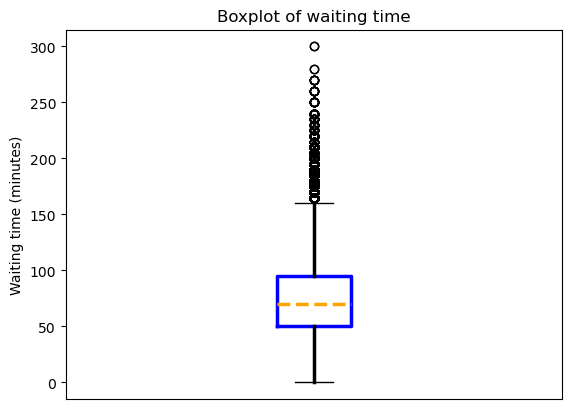

In [96]:
# Remove -999 and NaN
df_7_dwarfs = df_7_dwarfs_raw[~df_7_dwarfs_raw['SPOSTMIN'].isnull() & (df_7_dwarfs_raw['SPOSTMIN'] >= 0)]

# Create the boxplot
color = dict(boxes='black', whiskers='black', medians='red', caps='black')
ax = df_7_dwarfs.boxplot('SPOSTMIN',
                            grid=False,
                            color = color,
                            whiskerprops = dict(ls='-', lw=2.5, color='black'),
                            boxprops = dict(ls = '-', lw=2.5, color = 'blue'),
                            medianprops = dict(ls = '--', lw=2.5, color = 'orange'))

# Customize the plot further
ax.set_title('Boxplot of waiting time')
ax.set_ylabel('Waiting time (minutes)')
ax.axes.get_xaxis().set_visible(False)

**Part 2**: Boxplot for each day of the week.

In [108]:
df_7_dwarfs['day_name'] = pd.to_datetime(df_7_dwarfs['datetime'], format = '%d/%m/%Y %H:%M').dt.day_name()
df_7_dwarfs['day_name'] = pd.Categorical(df_7_dwarfs['day_name'],
                                            categories = list(calendar.day_name),
                                            ordered = True)

C:\Users\timH\AppData\Local\Temp\ipykernel_14696\51066283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7_dwarfs['day_name'] = pd.to_datetime(df_7_dwarfs['datetime'], format = '%d/%m/%Y %H:%M').dt.day_name()
C:\Users\timH\AppData\Local\Temp\ipykernel_14696\51066283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7_dwarfs['day_name'] = pd.Categorical(df_7_dwarfs['day_name'],


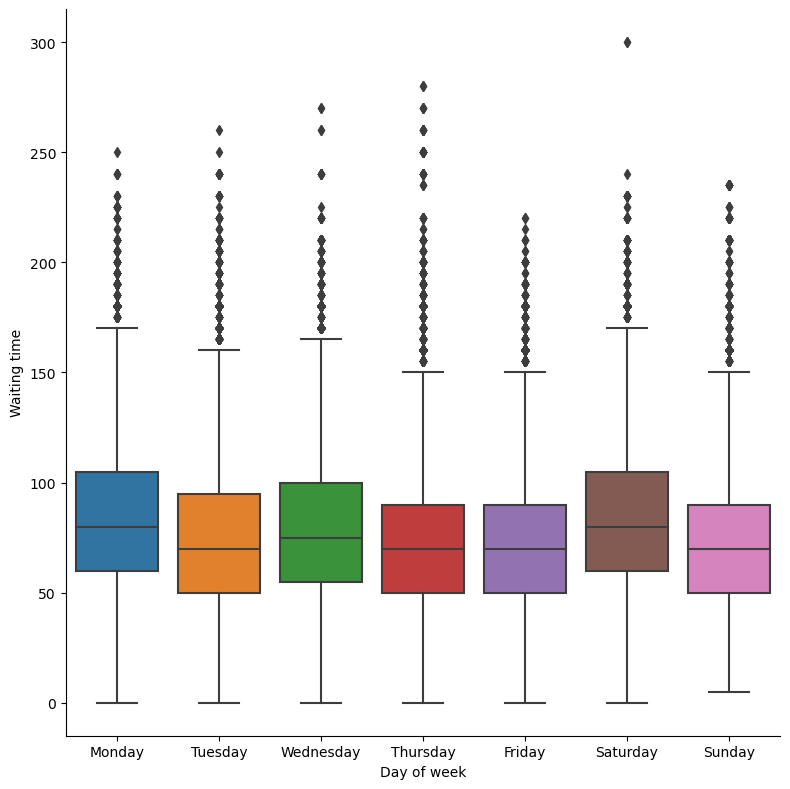

In [133]:
axis = sns.catplot(data=df_7_dwarfs,
                kind ='box',
                x = 'day_name',
                y = 'SPOSTMIN',
                hue = 'day_name',
                height = 8,
                aspect = 1,
                dodge = False)

axis.set_axis_labels('Day of week', 'Waiting time')

Text(0, 0.5, 'Waiting time')

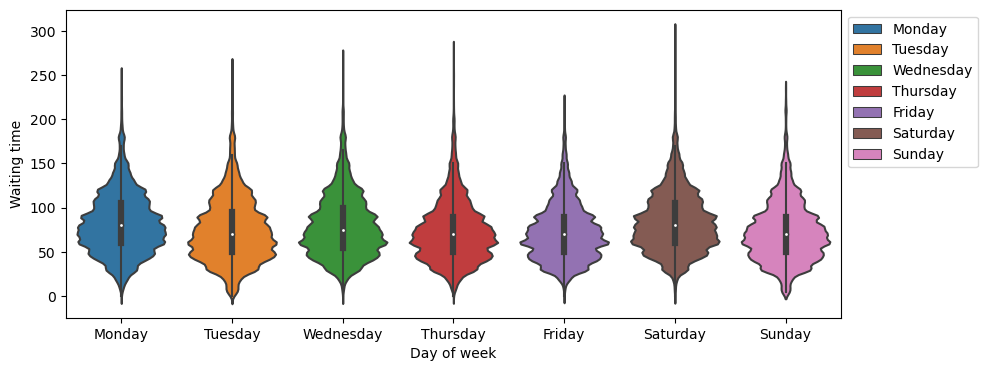

In [160]:
fig, ax = plt.subplots(figsize = (10, 4))

sns.violinplot(data=df_7_dwarfs,
                kind ='box',
                x = 'day_name',
                y = 'SPOSTMIN',
                hue = 'day_name',
                dodge = False)

ax.legend(bbox_to_anchor = (1, 1))
ax.set_xlabel('Day of week')
ax.set_ylabel('Waiting time')

## Oefening 4: sp500, plotting many correlations

In [140]:
df_sp500_raw = pd.read_csv(loc_sp500, index_col = [0])
df_sp500_sectors = pd.read_csv(loc_sp500_sectors)

df_sp500 = df_sp500_raw.copy()
start_date = pd.to_datetime('2012-07-01')
sector = 'etf'

<AxesSubplot:>

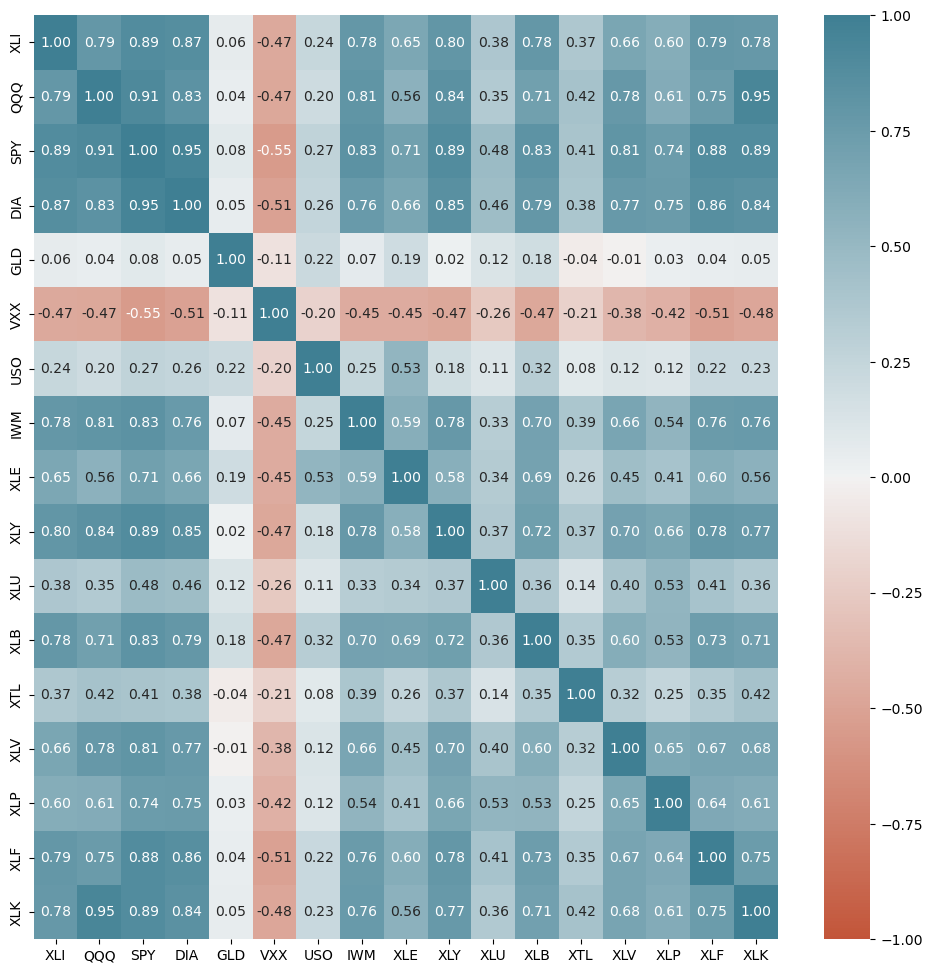

In [141]:
df_sp500.index = pd.to_datetime(df_sp500.index, format = '%Y-%m-%d')
df_etfs = df_sp500.loc[(df_sp500.index > start_date),
                        (df_sp500_sectors.query('sector == @sector')['symbol'])]

fig, ax = plt.subplots(figsize = (12, 12))

sns.heatmap(df_etfs.corr(),
                vmin = -1,
                vmax = 1,
                cmap = sns.diverging_palette(20, 220, as_cmap = True),
                annot=True,
                fmt=".2f",
                ax = ax)

## Oefening 5: sp500 linear regression

##### Just a scatterplot.

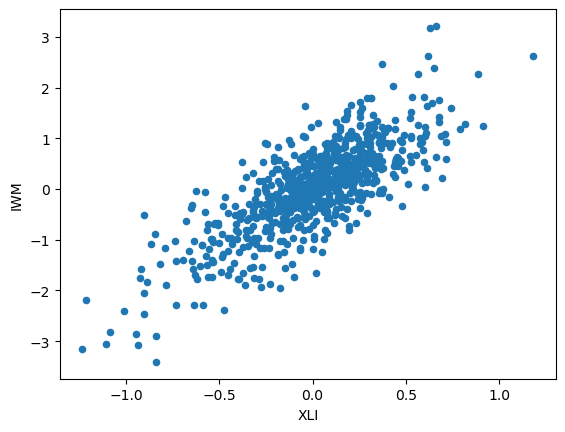

#### Add a regression line to the scatterplot

In [149]:
def calculate_regression_line(x, y):
    """
    Calculates the regression line between two 1-dimensional vectors using scikit-learn.

    Parameters:
    x (numpy array or list): The independent variable vector.
    y (numpy array or list): The dependent variable vector.

    Returns:
    tuple: A tuple containing the slope and intercept of the regression line.
    """
    # Convert the input vectors to numpy arrays if they are not already
    x = np.array(x).reshape(-1, 1)
    y = np.array(y)

    # Fit the linear regression model
    regression_model = LinearRegression()
    regression_model.fit(x, y)

    # Extract the slope and intercept of the regression line
    slope = regression_model.coef_[0]
    intercept = regression_model.intercept_

    return slope, intercept

In [150]:
slope, intercept = calculate_regression_line(x = df_sp500['XLI'], y = df_sp500['IWM'])

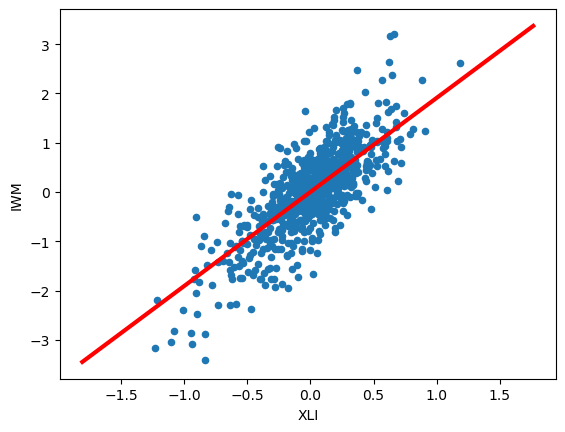

In [151]:
xx = np.linspace(df_sp500['XLI'].min(), df_sp500['XLI'].max())
ax = df_etfs.plot.scatter(x = 'XLI', y = 'IWM');

ax.plot(xx,
            intercept + slope * xx,
            color = 'red',
            lw = 3)

df_7_dwarfs